# Apply of the CRISP-DM data mining methodology to analyse the data

Saiful Islam (10634911)

Ruhit Ahmed Rizon (10640049)

Sandra Sabu (10637636)

In this notebook we're going to apply the steps of the CRISP-DM data mining methodology to analyse the data

We will be using Neo4j Community Edition and perform EDA part using Python Py2Neo library

The dataset we choose for this project: Crime Investigation. Link: https://github.com/neo4j-graph-examples/pole

# Section-1: Business Understanding
Crime data for this demo was downloaded from public sources (http://data.gov.uk), and is freely provided for download with locations defined to the block or street level and crimes defined by month only (i.e. no day or timestamp). This public crime data does not include any sort of information about persons related to crimes, not even as anonymized tokens - it supplies only crime and location data, or in other words only the 'L' and 'E' for the POLE model. This demo uses street crime data for Greater Manchester, UK from August 2017.

Unique crime IDs, longitude, latitude, crime type, street/locale name, and last outcome values were taken from the public street crime data files. UK postcodes were retrieved from a public API using Longitude and Latitude, and randomly generated or curated data was used for other entities in the database (vehicles, officers, people, phone numbers, phone calls, emails, day of the month, etc.).

The different ways that Persons can be related to each other. There is a general 'KNOWS' relationship, as well as more specific relationship types: FAMILY_REL (related to), KNOWS_LW (lives with), KNOWS_PHONE (has a related phone call), and KNOWS_SN (social network).

Notice also that Location is associated to both Postcode and Area. In the UK, Postcodes follow a format which splits the postcode into two sections - for example, M1 1AA. In this example, 'M1 1AA' is the Postcode, and 'M1' is the area. This allows us to group locations in different ways, and build query paths that are either more specific (like Postcode, which is typically limited to a street or a few blocks) or more general (like Area, which could cover a town or city neighbourhood).

# Section-2: Data UnderstandingSection-2: Data Understanding
Crime Investigation dbms can be designed as POLE (Person, Object, Location, Events) model
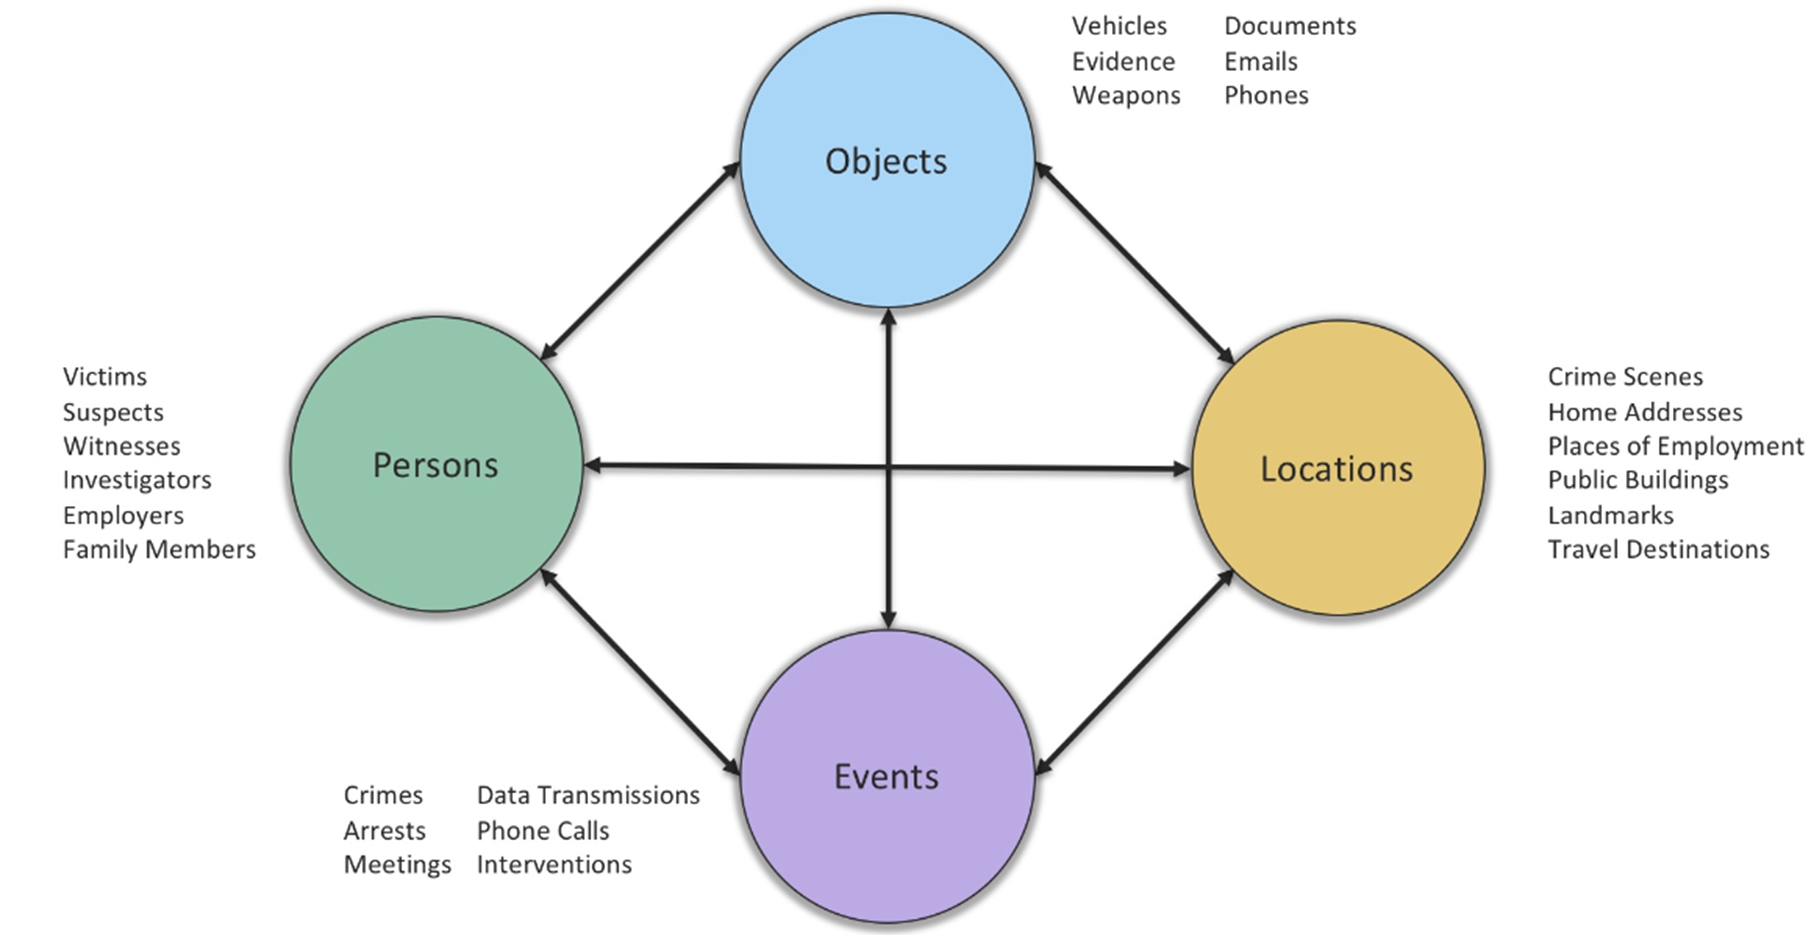

POLE Model Use Cases

The POLE data model is a standard approach used in policing, investigative, and security use cases. It can also, however, be applied in other areas. Typical POLE use cases include:
* Policing
* Counter Terrorism
* Border Control / Immigration
* Child Protection / Social Services
* Missing Persons
* Offender Rehabilitation
* Insurance Fraud Investigations

Graphs are a perfect fit for use cases like these, where it is important to be able to work with highly connected data in real time. Using a real-time graph helps investigators to be proactive and prevent crime or other incidents, rather than simply being reactive after an incident has occurred. A POLE graph can also be used to generate insights into patterns of behaviour and incidents, which can inform new approaches and enable more targeted use of limited resources.

# Section-3: Data Preparation & EDA

Installing necessary libraries

In [2]:
!pip install py2neo pandas
!pip install py2neo pandas matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Loading necessary libraries

In [3]:
from py2neo import Graph
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import pandas as pd

Loading the database into our local neo4j database
In this section, at first, we created a local database into our Neo4j Desktop named: stackoverflowdb. We choose the db version: 5.5.0

Then apply the following credentials to connnect to our local database:

In [4]:
graph = Graph("bolt://localhost:7687", auth=("neo4j", "0987654321")) 

After that, we downloaded the crime investigation repo from https://github.com/neo4j-graph-examples/pole

After extracting the zip file, pole-50.dump from data folder has been loaded into neo4j desktop. Then database has been created from the dump file.

Schema visualization

In [5]:
graph.run("CALL db.schema.visualization()").data()

[{'nodes': [Node('Vehicle', constraints=[], indexes=[], name='Vehicle'),
   Node('Area', constraints=[], indexes=['areaCode'], name='Area'),
   Node('Email', constraints=[], indexes=[], name='Email'),
   Node('Phone', constraints=[], indexes=[], name='Phone'),
   Node('Crime', constraints=[], indexes=['last_outcome', 'type'], name='Crime'),
   Node('PhoneCall', constraints=[], indexes=[], name='PhoneCall'),
   Node('Object', constraints=[], indexes=['type'], name='Object'),
   Node('PostCode', constraints=[], indexes=['code'], name='PostCode'),
   Node('Person', constraints=[], indexes=['name', 'nhs_no', 'surname'], name='Person'),
   Node('Location', constraints=[], indexes=['postcode', 'address'], name='Location'),
   Node('Officer', constraints=[], indexes=['rank', 'surname'], name='Officer')],
  'relationships': [INVOLVED_IN(Node(), Node()),
   INVOLVED_IN(Node(), Node()),
   CALLER(Node(), Node()),
   KNOWS_PHONE(Node(), Node()),
   FAMILY_REL(Node(), Node()),
   INVESTIGATED_BY(N

After running this code into neo4j Browser, the following graph has been generated

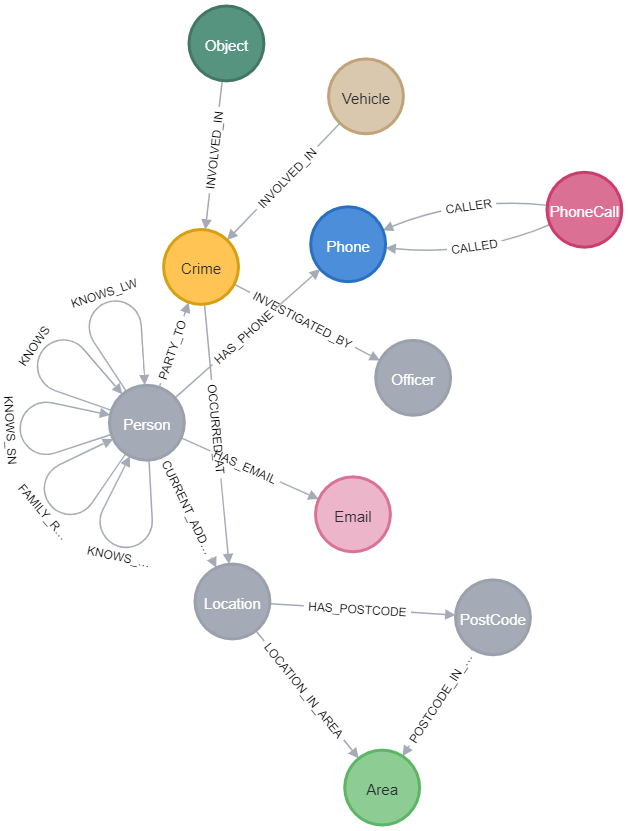

No of nodes per label

In [7]:
result = {"label": [], "count": []}
for label in graph.run("CALL db.labels()").to_series():
    query = f"MATCH (:`{label}`) RETURN count(*) as count"
    count = graph.run(query).to_data_frame().iloc[0]['count']
    result["label"].append(label)
    result["count"].append(count)
nodes_df = pd.DataFrame(data=result)
nodes_df.sort_values("count") 

,label,count
9,Object,7
6,Area,93
2,Phone,328
3,Email,328
0,Person,369
7,PhoneCall,534
4,Officer,1000
10,Vehicle,1000
5,PostCode,14196
1,Location,14904


Visualization using matplotlib

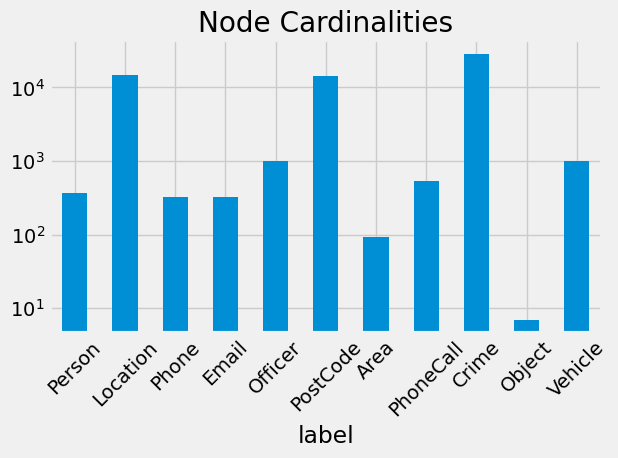

In [8]:
nodes_df.plot(kind='bar', x='label', y='count', legend=None, title="Node Cardinalities")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

List of types of relationships

In [9]:
result = {"Relationship Type": [], "Count": []}
for relationship_type in graph.run("CALL db.relationshipTypes()").to_series():
    query = f"MATCH ()-[:`{relationship_type}`]->() RETURN count(*) as Count"
    count = graph.run(query).to_data_frame().iloc[0]['Count']
    result["Relationship Type"].append(relationship_type)
    result["Count"].append(count)
rels_df = pd.DataFrame(data=result)
rels_df.sort_values("Count")


,Relationship Type,Count
14,PARTY_TO,55
16,KNOWS_LW,80
10,KNOWS_PHONE,118
15,FAMILY_REL,155
6,KNOWS_SN,241
1,HAS_PHONE,328
2,HAS_EMAIL,328
0,CURRENT_ADDRESS,368
9,CALLED,534
8,CALLER,534


Visualization of the Relationship count result

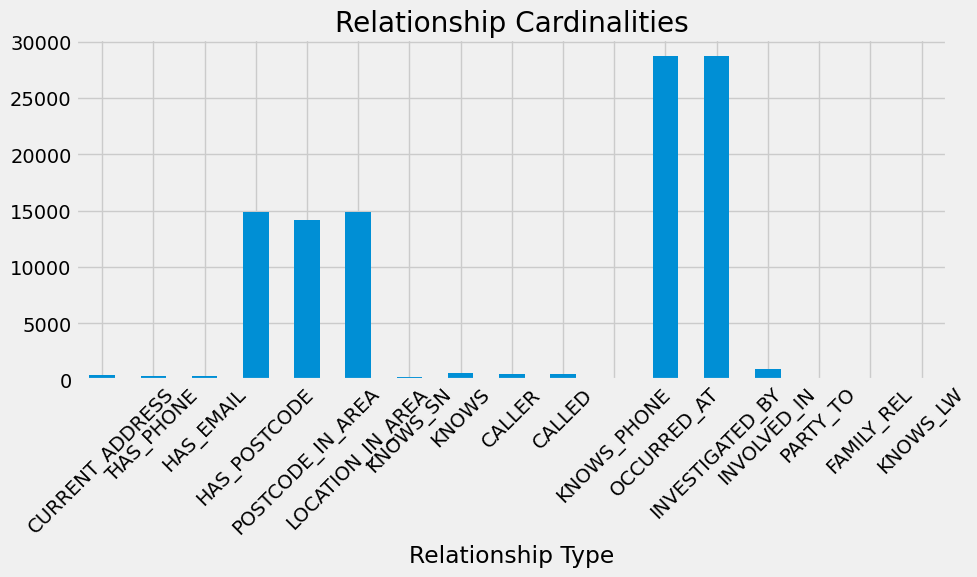

In [10]:
rels_df.plot(kind='bar', x='Relationship Type', y='Count', legend=None, title="Relationship Cardinalities", figsize=(10,6))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

List of labels

In [11]:
query = """ MATCH (n) RETURN labels(n) as Label, count(*) as Count; """
result = pd.DataFrame(graph.run(query).to_data_frame())
result_dict = {'Label': [], 'Count': []}
result['Label'] = [line for line in result['Label'].str[0]]
result['Count'] = [line for line in result['Count']]
result_df = pd.DataFrame(result)
result_df

,Label,Count
0,Person,369
1,Location,14904
2,Phone,328
3,Email,328
4,Officer,1000
5,Crime,28762
6,PhoneCall,534
7,PostCode,14196
8,Area,93
9,Vehicle,1000


Visualization of Label vs Count

<Axes: title={'center': 'Label vs Count'}, xlabel='Label'>

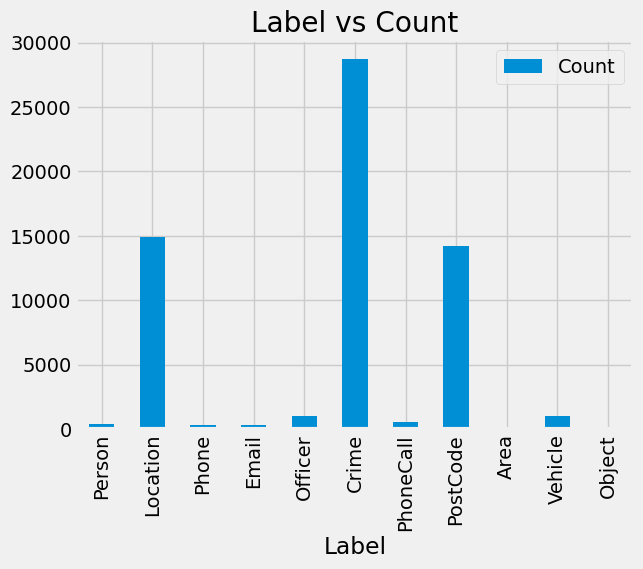

In [12]:
result_df.plot(x='Label', y='Count', kind='bar', title='Label vs Count')

Total crimes

In [13]:
query = """MATCH (c:Crime) RETURN c.type AS `Crime Type`, count(c) AS Total ORDER BY count(c) DESC;"""
result = pd.DataFrame(graph.run(query).to_data_frame())
result

,Crime Type,Total
0,Violence and sexual offences,8765
1,Public order,4839
2,Criminal damage and arson,3587
3,Burglary,2807
4,Vehicle crime,2598
5,Other theft,2140
6,Shoplifting,1427
7,Other crime,651
8,Robbery,541
9,Theft from the person,423


Visualization of Crime Type vs Total

<Axes: title={'center': 'Crime Type vs Total'}, xlabel='Crime Type'>

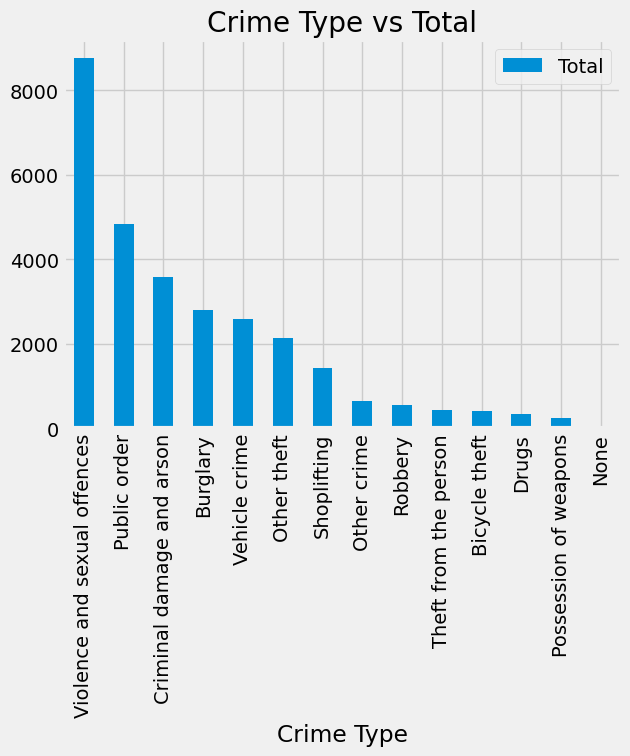

In [14]:
result.plot(x='Crime Type', y='Total', kind='bar', title='Crime Type vs Total')

Top locations for crimes

In [15]:
query = """MATCH (l:Location)<-[:OCCURRED_AT]-(:Crime) RETURN l.address AS Address, l.postcode AS `Post Code`, count(l) AS Total ORDER BY count(l) DESC LIMIT 15;"""
result = pd.DataFrame(graph.run(query).to_data_frame())
result

,Address,Post Code,Total
0,Piccadilly,M1 1LU,166
1,Shopping Area,M60 1TA,111
2,Prison,M60 9AH,48
3,Shopping Area,M4 3AL,46
4,Nightclub,M1 3LZ,41
5,Parking Area,M90 2AY,38
6,Supermarket,WN7 5SJ,38
7,Nightclub,M4 2BS,36
8,182 Waterson Avenue,M40 9BY,35
9,43 Walker's Croft,M3 1DA,35


Visualiztion of top locations for crimes

<Axes: title={'center': 'Top locations for crimes'}, xlabel='Address'>

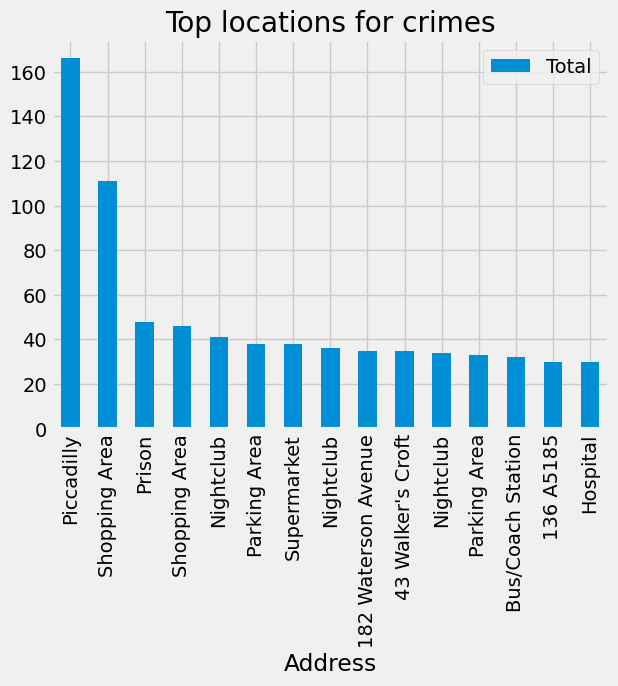

In [16]:
result.plot(x='Address', y='Total', kind='bar', title='Top locations for crimes')

Crimes near a particular address

In [21]:
query = """MATCH (l:Location {address: '178 Polding Street'})
WITH point(l) AS corrie
MATCH (x:Location)-[:HAS_POSTCODE]->(p:PostCode),
(x)<-[:OCCURRED_AT]-(c:Crime)
WITH x, p, c, point.distance(point(x), corrie) AS distance
WHERE distance < 500
RETURN x.address AS Address, p.code AS `Post code`, count(c) AS `Crime Total`, collect(distinct(c.type)) AS `Crime Type`, distance as Distance
ORDER BY distance
LIMIT 10"""
result = pd.DataFrame(graph.run(query).to_data_frame())
result

,Address,Post code,Crime Total,Crime Type,Distance
0,178 Polding Street,WN3 4NL,1,[Violence and sexual offences],0.000
1,58 Kinsley Close,WN3 4PQ,2,"[Public order, Violence and sexual offences]",175.555
2,63 Chatsworth Fold,WN3 4JA,1,[Violence and sexual offences],342.221
3,48 Cecil Street,WN3 4TS,3,"[Other theft, Vehicle crime, Violence and sexu...",388.287
4,134 Deakin Street,WN3 4NF,2,"[Public order, Violence and sexual offences]",416.302
5,32 Wessex Drive,WN3 4JJ,1,[Public order],419.941
6,26 Chester Close,WN3 4JP,1,[Vehicle crime],440.569
7,130 Sherbourne Place,WN3 4LL,1,[Criminal damage and arson],473.607
8,12 Banner Street,WN3 4NA,3,"[Violence and sexual offences, Drugs]",490.217


Crimes investigated by Inspector Wynn

In [22]:
query = """MATCH (o:Officer {rank: 'Chief Inspector', name: 'Wynn'})<-[i:INVESTIGATED_BY]-(c:Crime) RETURN *"""
result = pd.DataFrame(graph.run(query).to_data_frame())
result

,c,i,o
0,"{'date': '9/08/2017', 'id': '94ef75e90f12f5921...",{},"{'badge_no': '38-1719233', 'surname': 'Makinso..."
1,"{'date': '22/08/2017', 'id': 'a2b7c8b9935872d5...",{},"{'badge_no': '38-1719233', 'surname': 'Makinso..."
2,"{'date': '22/08/2017', 'id': 'fccbbf25cb3c34ef...",{},"{'badge_no': '38-1719233', 'surname': 'Makinso..."
3,"{'date': '11/08/2017', 'id': '1a8d22f8ecae41f0...",{},"{'badge_no': '38-1719233', 'surname': 'Makinso..."
4,"{'date': '16/08/2017', 'id': 'e9eff939e8b4c201...",{},"{'badge_no': '38-1719233', 'surname': 'Makinso..."
5,"{'date': '29/08/2017', 'id': '9ed6e790d5dc6805...",{},"{'badge_no': '38-1719233', 'surname': 'Makinso..."
6,"{'date': '26/08/2017', 'id': '2f97aeb82017dc41...",{},"{'badge_no': '38-1719233', 'surname': 'Makinso..."
7,"{'date': '16/08/2017', 'id': '2c715693f9de6802...",{},"{'badge_no': '38-1719233', 'surname': 'Makinso..."
8,"{'date': '1/08/2017', 'id': '2c0411eff6b59ad0b...",{},"{'badge_no': '38-1719233', 'surname': 'Makinso..."
9,"{'date': '11/08/2017', 'id': 'da6f4c29278b2093...",{},"{'badge_no': '38-1719233', 'surname': 'Makinso..."


Applying this query into neo4j desktop, we get the following graph:
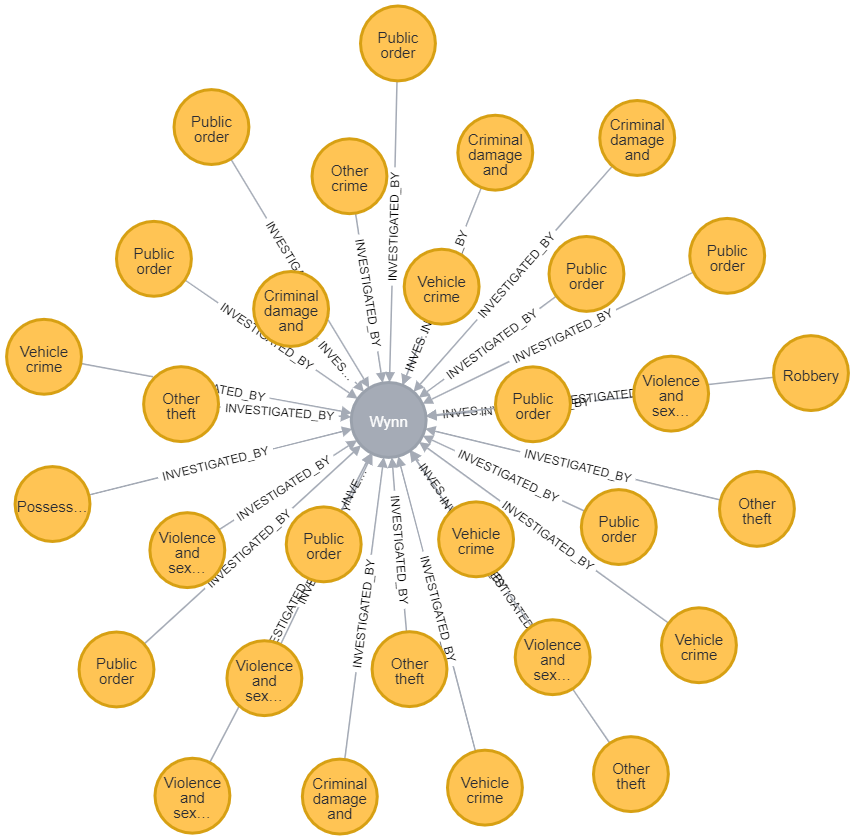

List of cases being investigated by officer Eimile

In [23]:
query = """MATCH (c:Crime {last_outcome: 'Under investigation'})-[i:INVESTIGATED_BY]->(o:Officer {badge_no: '18-0221971', name: 'Eimile'})
return *"""
result = pd.DataFrame(graph.run(query).to_data_frame())
result

,c,i,o
0,"{'date': '21/08/2017', 'id': '80479e82bbd58787...",{},"{'badge_no': '18-0221971', 'surname': 'Lampet'..."
1,"{'date': '31/08/2017', 'id': 'b5c8906d935de5ad...",{},"{'badge_no': '18-0221971', 'surname': 'Lampet'..."
2,"{'date': '2/08/2017', 'id': 'c767d3a883dbc9583...",{},"{'badge_no': '18-0221971', 'surname': 'Lampet'..."
3,"{'date': '6/08/2017', 'id': 'cff386b54fb78fc74...",{},"{'badge_no': '18-0221971', 'surname': 'Lampet'..."
4,"{'date': '18/08/2017', 'id': '0adf05ba5fbbf1b6...",{},"{'badge_no': '18-0221971', 'surname': 'Lampet'..."


Applying this query into neo4j desktop, we get the following graph:

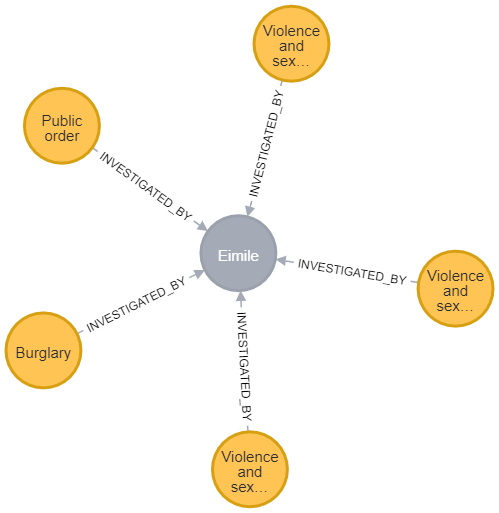

Shortest path between persons related to crimes: Drugs

In [24]:
query = """MATCH (c:Crime {last_outcome: 'Under investigation', type: 'Drugs'})-[:INVESTIGATED_BY]->(:Officer {badge_no: '26-5234182'}),
(c)<-[:PARTY_TO]-(p:Person)
WITH COLLECT(p) AS persons
UNWIND persons AS p1
UNWIND persons AS p2
WITH * WHERE id(p1) < id(p2)
MATCH path = allshortestpaths((p1)-[:KNOWS|KNOWS_LW|KNOWS_SN|FAMILY_REL|KNOWS_PHONE*..3]-(p2))
RETURN path"""
result = pd.DataFrame(graph.run(query).to_data_frame())
result

,path
0,"({}, {}, {'rel_type': 'PARENT'})"
1,"({}, {}, {})"
2,"({'rel_type': 'PARENT'}, {}, {'rel_type': 'PAR..."
3,"({'rel_type': 'PARENT'}, {}, {})"
4,"({}, {}, {'rel_type': 'PARENT'})"
5,"({}, {}, {})"
6,"({'rel_type': 'PARENT'}, {}, {'rel_type': 'PAR..."
7,"({'rel_type': 'PARENT'}, {}, {})"
8,"({}, {}, {'rel_type': 'SIBLING'})"
9,"({}, {}, {})"


Applying this query into neo4j desktop, we get the following graph:

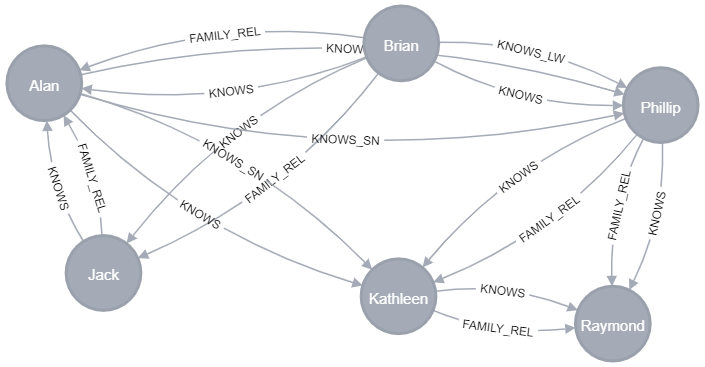

Related people associated with drugs crimes

In [25]:
query = """MATCH path = (:Officer {badge_no: '26-5234182'})<-[:INVESTIGATED_BY]-(:Crime {type: 'Drugs'})<-[:PARTY_TO]-(:Person)-[:KNOWS*..3]-(:Person)-[:PARTY_TO]->(:Crime {type: 'Drugs'}) RETURN path"""
result = pd.DataFrame(graph.run(query).to_data_frame())
result

,path
0,"({}, {}, {}, {}, {})"
1,"({}, {}, {}, {}, {})"
2,"({}, {}, {}, {}, {})"
3,"({}, {}, {}, {}, {}, {})"
4,"({}, {}, {}, {}, {}, {})"
...,...
85,"({}, {}, {}, {}, {}, {})"
86,"({}, {}, {}, {}, {}, {})"
87,"({}, {}, {}, {}, {}, {})"
88,"({}, {}, {}, {}, {}, {})"


Applying this query into neo4j desktop, we get the following graph:

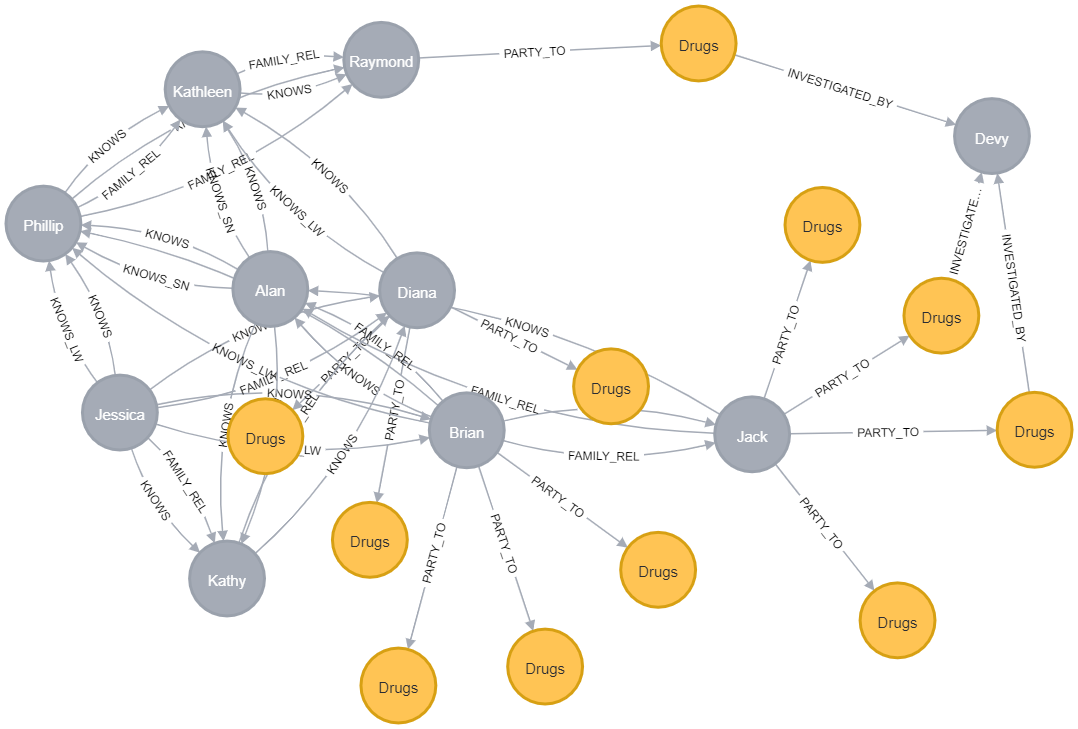

Top people at risk of bering associated with crimes in future

In [26]:
query = """MATCH (p:Person)-[:KNOWS]-(friend)-[:PARTY_TO]->(:Crime)
WHERE NOT (p:Person)-[:PARTY_TO]->(:Crime)
RETURN p.name AS Name, p.surname AS Surname, p.nhs_no AS id, count(distinct friend) AS `Dangerous Friends`
ORDER BY `Dangerous Friends` DESC
LIMIT 5"""
result = pd.DataFrame(graph.run(query).to_data_frame())
result

,Name,Surname,id,Dangerous Friends
0,Anne,Freeman,804-54-6976,8
1,Bonnie,Gilbert,622-53-3302,7
2,Ashley,Robertson,554-93-4466,5
3,Kathy,Wheeler,218-31-0921,3
4,Pamela,Gibson,838-11-7607,2


Visualization of top vulnerable people

<Axes: title={'center': 'Top vulnerable people'}, xlabel='Name'>

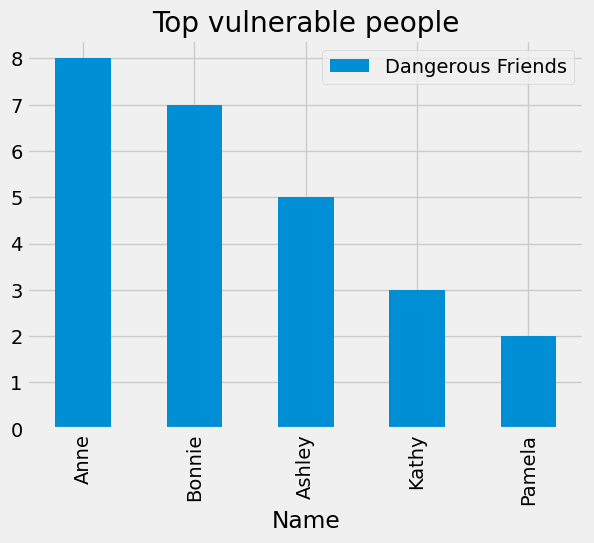

In [27]:
result.plot(x='Name', y='Dangerous Friends', kind='bar', title='Top vulnerable people')

Dangerous Family Friends

In [28]:
query = """MATCH (p:Person)-[:FAMILY_REL]-(relative)-[:KNOWS]-(famFriend)-[:PARTY_TO]->(:Crime)
WHERE NOT (p:Person)-[:PARTY_TO]->(:Crime) AND
 NOT (relative)-[:PARTY_TO]->(:Crime)
RETURN p.name AS Name, p.surname AS Surname, p.nhs_no AS id, count(DISTINCT famFriend) AS `Dangerous Family Friends`
ORDER BY `Dangerous Family Friends` DESC
LIMIT 5"""
result = pd.DataFrame(graph.run(query).to_data_frame())
result

,Name,Surname,id,Dangerous Family Friends
0,Kimberly,Alexander,548-59-5017,7
1,Walter,Wheeler,263-14-7231,2
2,Kimberly,Wood,859-40-9947,2
3,Henry,Palmer,219-06-7487,2
4,Andrea,Moreno,240-77-5251,2


Visualization of dangerous Family Friends

<Axes: title={'center': 'Dangerous Family Friends'}, xlabel='Name'>

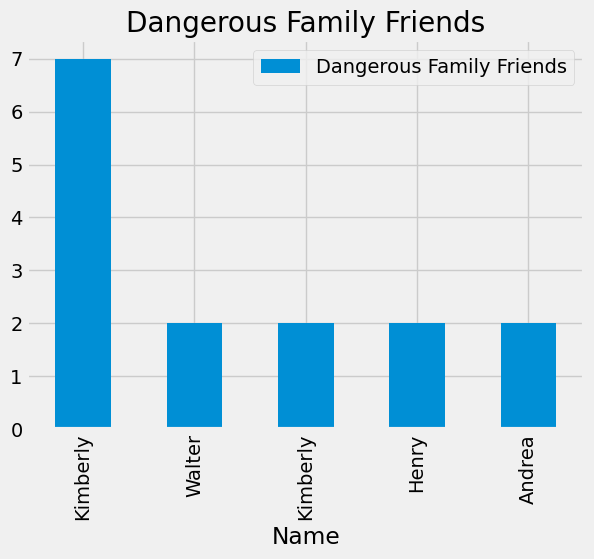

In [29]:
result.plot(x='Name', y='Dangerous Family Friends', kind='bar', title='Dangerous Family Friends')

# Section-4: Modelling - Implementation of Graph algorithms

Showing the results of the graph by selecting a specific person having relation with others. Here we run the below query and set the limit into 25. So in this 25 nodes, only 7 nodes has relation with the given node. so it is showing 7 nodes.

In [42]:
graph.run("""
MATCH path = (:Person {nhs_no: '863-96-9468', surname: 'Duncan'})-[:KNOWS*..3]-(:Person)
WITH nodes(path) AS allNodes
UNWIND allNodes AS node
RETURN node
LIMIT 25;
""").to_data_frame()

,node
0,"{'nhs_no': '863-96-9468', 'centrality': 0.2815..."
1,"{'nhs_no': '263-14-7231', 'centrality': 0.2197..."
2,"{'nhs_no': '863-96-9468', 'centrality': 0.2815..."
3,"{'nhs_no': '263-14-7231', 'centrality': 0.2197..."
4,"{'nhs_no': '358-19-2542', 'centrality': 0.2373..."
5,"{'nhs_no': '863-96-9468', 'centrality': 0.2815..."
6,"{'nhs_no': '263-14-7231', 'centrality': 0.2197..."
7,"{'nhs_no': '358-19-2542', 'centrality': 0.2373..."
8,"{'nhs_no': '397-28-4474', 'centrality': 0.2316..."
9,"{'nhs_no': '863-96-9468', 'centrality': 0.2815..."


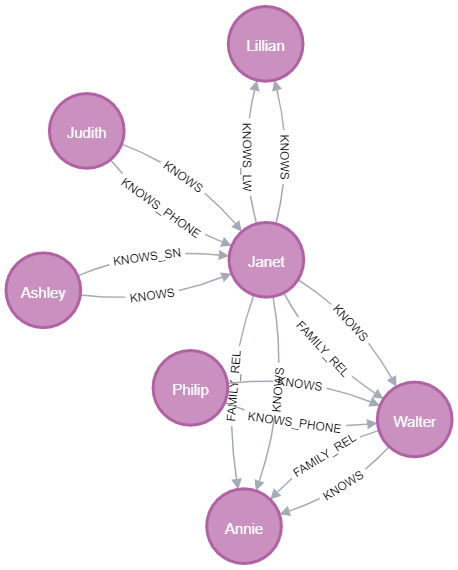

Computing Betweenness Centrality Algorithm

In [ ]:
graph.run("""
CALL gds.betweenness.write('social', { writeProperty: 'betweenness' })
YIELD centralityDistribution, nodePropertiesWritten
RETURN centralityDistribution.min AS minimumScore, centralityDistribution.mean AS meanScore, nodePropertiesWritten;
""").to_data_frame()

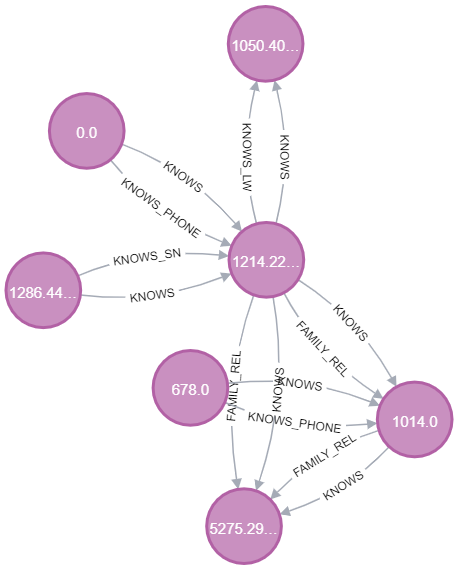

Computing Clossness

In [35]:
graph.run("""
CALL gds.beta.closeness.write('social',{writeProperty: 'closeness'});
""").to_data_frame()

,nodePropertiesWritten,writeProperty,centralityDistribution,writeMillis,postProcessingMillis,preProcessingMillis,computeMillis,configuration
0,369,closeness,"{'p99': 1.0000066757202148, 'min': 0.0, 'max':...",6,17,0,3,{'jobId': '0a84dc19-e152-4d42-8635-a17840e8816...


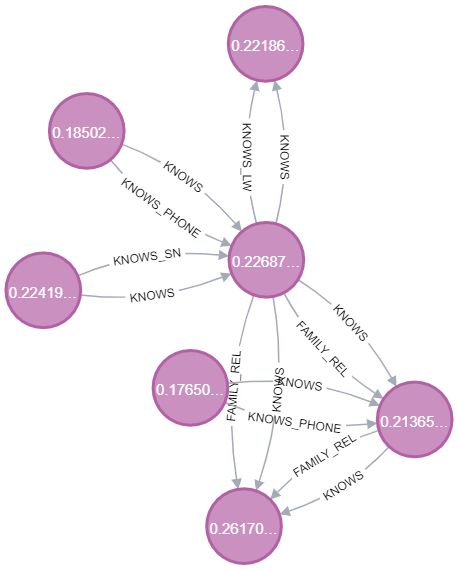

Computing Harmonic Closeness

In [37]:
graph.run("""
CALL gds.alpha.closeness.harmonic.write('social',{writeProperty: 'harmonic'});
""").to_data_frame()

,nodes,preProcessingMillis,computeMillis,writeMillis,writeProperty,centralityDistribution
0,369,0,3,9,harmonic,"{'p99': 0.2683887332677841, 'min': 0.0, 'max':..."


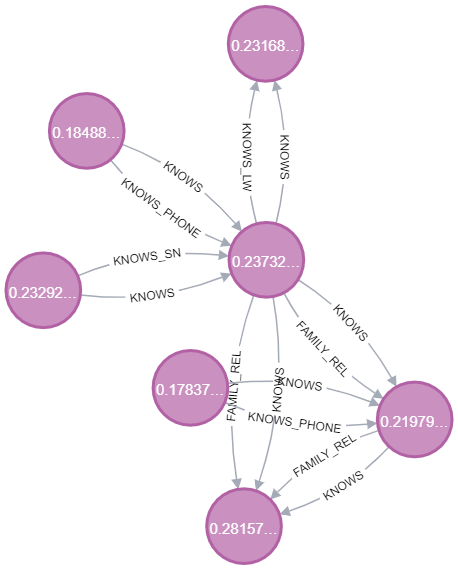

Computing PageRank

In [38]:
graph.run("""
CALL gds.pageRank.write('social', {
  maxIterations: 20,
  dampingFactor: 0.85,
  writeProperty: 'pagerank'
})
YIELD nodePropertiesWritten, ranIterations;
""").to_data_frame()

,nodePropertiesWritten,ranIterations
0,369,20


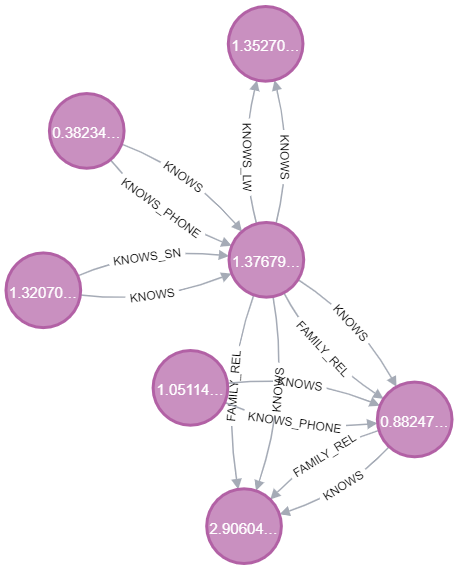

Computing Degree Centrality

In [39]:
graph.run("""
CALL gds.degree.write('social', {writeProperty: 'degree'});
""").to_data_frame()

,nodePropertiesWritten,centralityDistribution,writeMillis,postProcessingMillis,preProcessingMillis,computeMillis,configuration
0,369,"{'p99': 11.000053405761719, 'min': 0.0, 'max':...",7,27,0,0,{'jobId': '08d312bf-01a4-4965-a734-ffdc1565344...


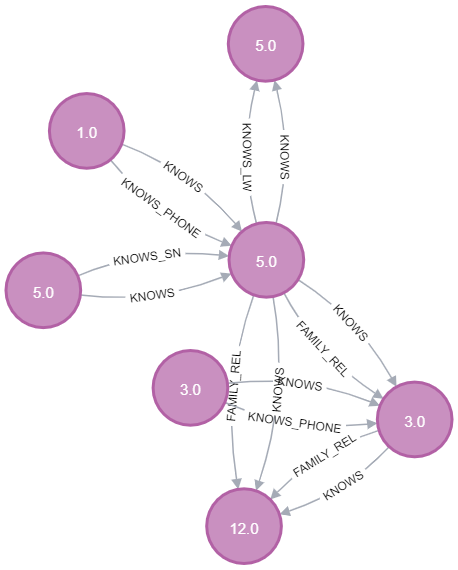

Computing EigenVector

In [40]:
graph.run("""
CALL gds.eigenvector.write('social', {
  maxIterations: 20,
  writeProperty: 'eigencentrality'
})
YIELD nodePropertiesWritten, ranIterations;
""").to_data_frame()

,nodePropertiesWritten,ranIterations
0,369,20


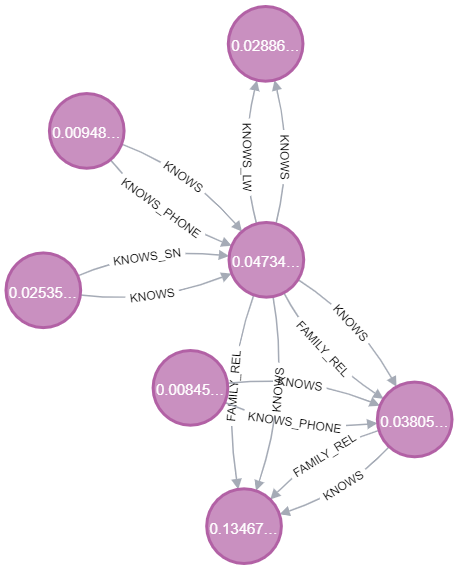

Community Detection Algorithm

In [6]:
graph.run("""
CALL gds.louvain.stream('mygraph')
YIELD nodeId, communityId, intermediateCommunityIds
RETURN gds.util.asNode(nodeId).name AS name, communityId
ORDER BY communityId ASC;
""").to_data_frame()

,name,communityId
0,Joe,0
1,Nancy,3
2,Todd,3
3,Rachel,3
4,George,3
...,...,...
364,Phillip,208
365,Jessica,208
366,Brian,208
367,Phillip,212


In [ ]:
Showing label propagation of the person nodes

In [7]:
graph.run("""
CALL gds.labelPropagation.stream('mygraph')
YIELD nodeId, communityId AS Community
RETURN gds.util.asNode(nodeId).name AS Name, Community
ORDER BY Community, Name;
""").to_data_frame()

,Name,Community
0,Carl,5
1,Nancy,5
2,Adam,9
3,Alan,9
4,Alice,9
...,...,...
364,Peter,1104
365,Janice,1126
366,Philip,1126
367,Rachel,1126


# Section-5: Evaluation
After performance analysis on our data, we can interpret that weighting for our searches and algorithms - for example, some crimes might be considered more dangerous than others (i.e. Violence and Sexual Offences is more serious than Shoplifting), or some relationships might be considered more reliable or closer (i.e 'Family' or 'Lives With' could be weighted more than 'Social Network')

# Section-6: Deployment
In terms of Artificial Intelligence of our domain problem, our derived graph algorithms can be applied to standard approach used in policing, investigative, and security use cases standard approach used in policing, investigative, and security use cases like:

* Policing
* Counter Terrorism
* Border Control / Immigration
* Child Protection / Social Services
* Missing Persons
* Offender Rehabilitation
* Insurance Fraud Investigations

We can predict which location has higher probability of occurring a crime, which person is at venerable condition, that is at higher risk of being indulge in criminal activities in near future.